# Riddler: Speeding to Work
May 19th 2017 [Riddler Express](http://fivethirtyeight.com/features/the-battle-for-riddler-nation-round-2/)

In [1]:
import numpy as np
from numpy import random

Create the `Driver` class for the simulation. The driver will have a `name`, a number 0 < `caught_speeding` < 1 which describes the probability that they will be caught speeding, and `alive` which indicates whether or not they've been caught. 

In [2]:
class Driver(object):
    def __init__(self, name, caught_speeding, alive):
        self.name = 'Driver {}'.format(name)
        self.caught_speeding = caught_speeding
        self.alive = alive
    
    def drive(self, verbose=0):
        probability = self.caught_speeding
        police = random.random()
        if verbose>0: print("Police score:", police)
        if police <= probability:
            self.alive = 0
            if verbose>0: print("{} has been caught, life is {}".format(self.name,self.alive))
        

Now we can create the four drivers and set their probabilities. 

In [3]:
A = Driver('A', caught_speeding=.10, alive=1)
B = Driver('B', caught_speeding=.15, alive=1)
C = Driver('C', caught_speeding=.20, alive=1)
D = Driver('D', caught_speeding=.25, alive=1)

initial_drivers = [A, B, C, D]

Now we need to write a function which will play out the game. 

In [4]:
def Play(drivers, verbose=0, dverbose=0, count=0, initialize=True):
    # initialize drivers
    if initialize==True:
        for driver in drivers:
            driver.alive = 1
    if verbose>0: print("Initial Drivers are {}".format([driver.name for driver in drivers]), "\n")
    while len(drivers) > 0:
        selected_driver = random.choice(drivers)
        if verbose>0: print('{} is driving!'.format(selected_driver.name), "\n")
        selected_driver.drive(verbose=dverbose)
        living_drivers = []
        for driver in drivers:
            if driver.alive == 1:
                living_drivers.append(driver)
            if verbose>0 and driver.alive == 0:
                print('{} is caught!'.format(selected_driver.name))
        drivers = living_drivers
        if verbose>0:
            print("There are {} living drivers".format(len(drivers)), [driver.name for driver in drivers], "\n")
        
        count+=1
        if verbose>0: print("{} trips completed".format(count))
    return count
            
    
    

In [5]:
Play(initial_drivers)

19

Change the `verbose` and `dverbose` settings to see the full game. 
## Run the game 20,000 times and plot the results

In [7]:
import pandas as pd
import matplotlib.pylab as plt


In [17]:
trip_counts = []
for i in range(20000):
    trips = Play(initial_drivers)
    trip_counts.append(trips)
trip_counts = pd.Series(trip_counts)
trip_counts.name = 'trip_counts'


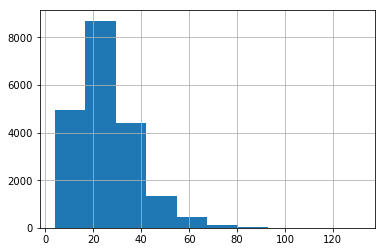

In [18]:
trip_counts.hist()
plt.show()

In [19]:
trip_counts.describe()

count    20000.000000
mean        25.708350
std         12.516794
min          4.000000
25%         17.000000
50%         23.000000
75%         32.000000
max        131.000000
Name: trip_counts, dtype: float64